# Memristor Simulation
This notebook simulates a memristor. The memristor is described by two equations:
$$
v(t) = \Big(R_{on}\frac{w(t)}{D} + R_{off}\Big(1 - \frac{w(t)}{D}\Big)\Big)i(t) \\
$$
and
$$
\frac{dw(t)}{dt} = \mu_v\frac{R_{on}}{D}i(t)
$$
This is simulated via `utils.py`

In [1]:
import numpy as np
from utils import *

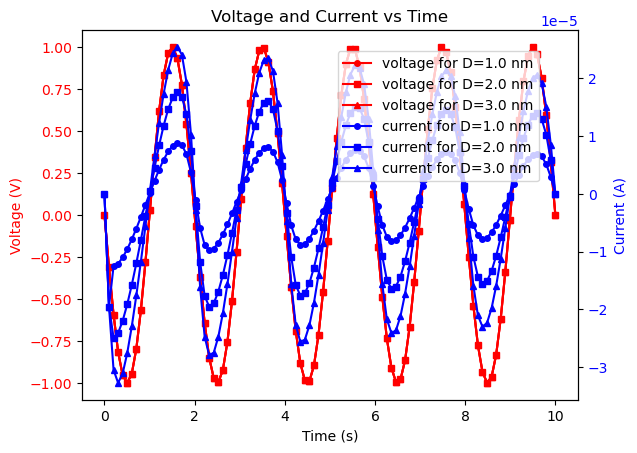

In [2]:
# device parameters
R_on = 100
R_off = 16e3
# D = 10e-9
Ds = [1e-9, 2e-9, 3e-9]
mu = 1e-14

# input signal
t = np.linspace(0, 10, 100)
v_t = np.empty((t.shape[0], 2))
v_t[:,0] = t
v_t[:,1] = -np.sin(np.pi*t)

# create the memristor
# mr = Memristor(R_on, R_off, D, mu)
mrs = [Memristor(R_on, R_off, D, mu) for D in Ds]
labeled_memristors = {}
for i in range(3):
    labeled_memristors[f"D={Ds[i]*1e9} nm"] = mrs[i].apply_voltage(v_t)

# plot
plot_i(labeled_memristors, markersize=4)


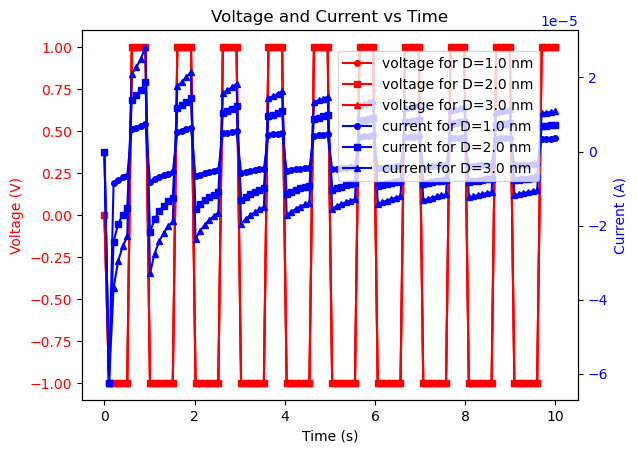

In [3]:
# t = np.linspace(0, 100, 1000)
t = np.linspace(0, 10, 100)

v_step = np.empty((t.shape[0], 2))
v_step[:,0] = t
# v_step[:,1] = 2*(np.arange(t.shape[0]) % 100 > 50) - 1
v_step[:,1] = 2*(np.arange(t.shape[0]) % 10 > 5) - 1
v_step[0,1] = 0

mrs = [Memristor(R_on, R_off, D, mu) for D in Ds]

labeled_memristors = {}
for i in range(3):
    labeled_memristors[f"D={Ds[i]*1e9} nm"] = mrs[i].apply_voltage(v_step)

# plot
plot_i(labeled_memristors, markersize=4)